## FRAUD DETECTİON(FRAUD ETKİLEŞİMİ) NEDİR ?



Kısaca bahsedecek olursam ödeme dünyasındaki sahtekarlık işlemlerinin tespitidir.Genellikle bu işlemler kayıp-çalıntı kartlar üzerinden gerçekleşir. Sanal ortamlarda 3D Secure gibi güvenli ödeme mekanizmaları sayesinde bu işlemler daha korunaklı bir haldedir.

Ben de bu tespitte içinde kart verilerinin bulunduğu bir dataseti inceleyip fraud verileri bulmaya çalışacağım

Bu veri setinde Temel Bileşen Analizi (PCA) ile boyut indirgeme yapılmış ve değişkenler tek bir değişkene odaklandırılmış.

Sınıflandırma algoritmalarını kullanmalıyız çünkü fraud veya fraud olmayan veri olarak ayıracağız

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,20)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,r2_score,mean_absolute_error,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,RobustScaler
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [21]:
df = pd.read_csv("creditcard.csv")

In [22]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,1.772925e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
#Verimiz ölçeklendirilmiş bir veri olduğundan ölçeklenmemiş olan verileri ölçeklendirmeliyiz
df["ScaledAmount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1,1))
df["ScaledTime"] = RobustScaler().fit_transform(df["Time"].values.reshape(-1,1))

In [27]:
df.drop(["Amount","Time"],axis=1,inplace=True)

In [28]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'ScaledAmount', 'ScaledTime'],
      dtype='object')

In [29]:
print("Fraud olmayanların veri setindeki oranı:  ", df["Class"].value_counts()[0]/len(df) *100)
print("Fraud olanların veri setindeki oranı:  ", df["Class"].value_counts()[1]/len(df) *100)

Fraud olmayanların veri setindeki oranı:   99.82725143693798
Fraud olanların veri setindeki oranı:   0.1727485630620034


Text(0.5, 1.0, 'Fraud and Non Fraud Count')

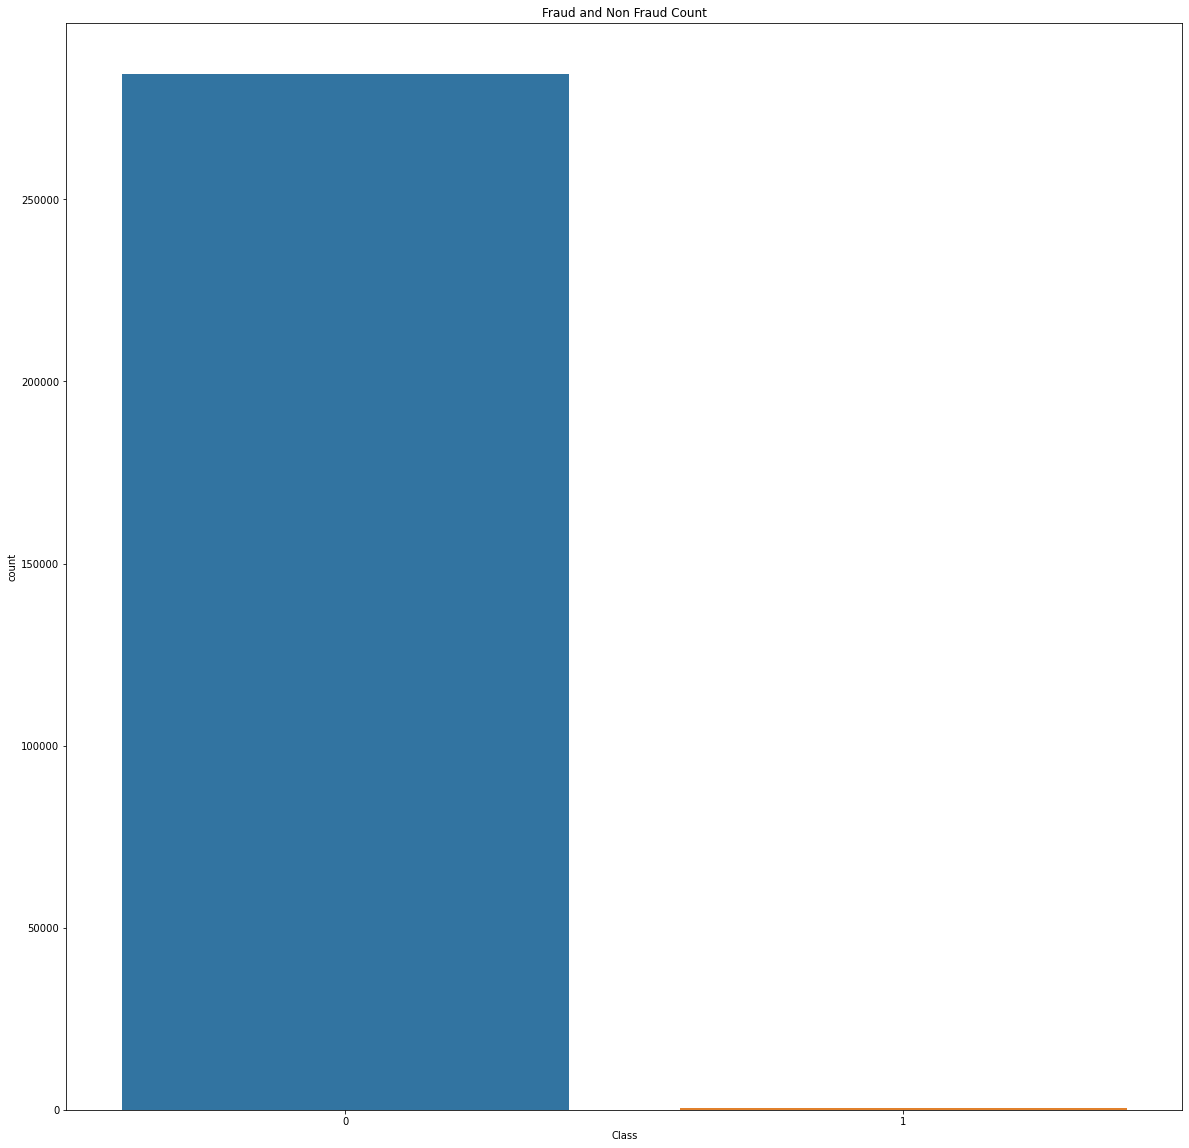

In [47]:
sns.countplot(df["Class"])
plt.title("Fraud and Non Fraud Count")

In [31]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount,ScaledTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


<AxesSubplot:>

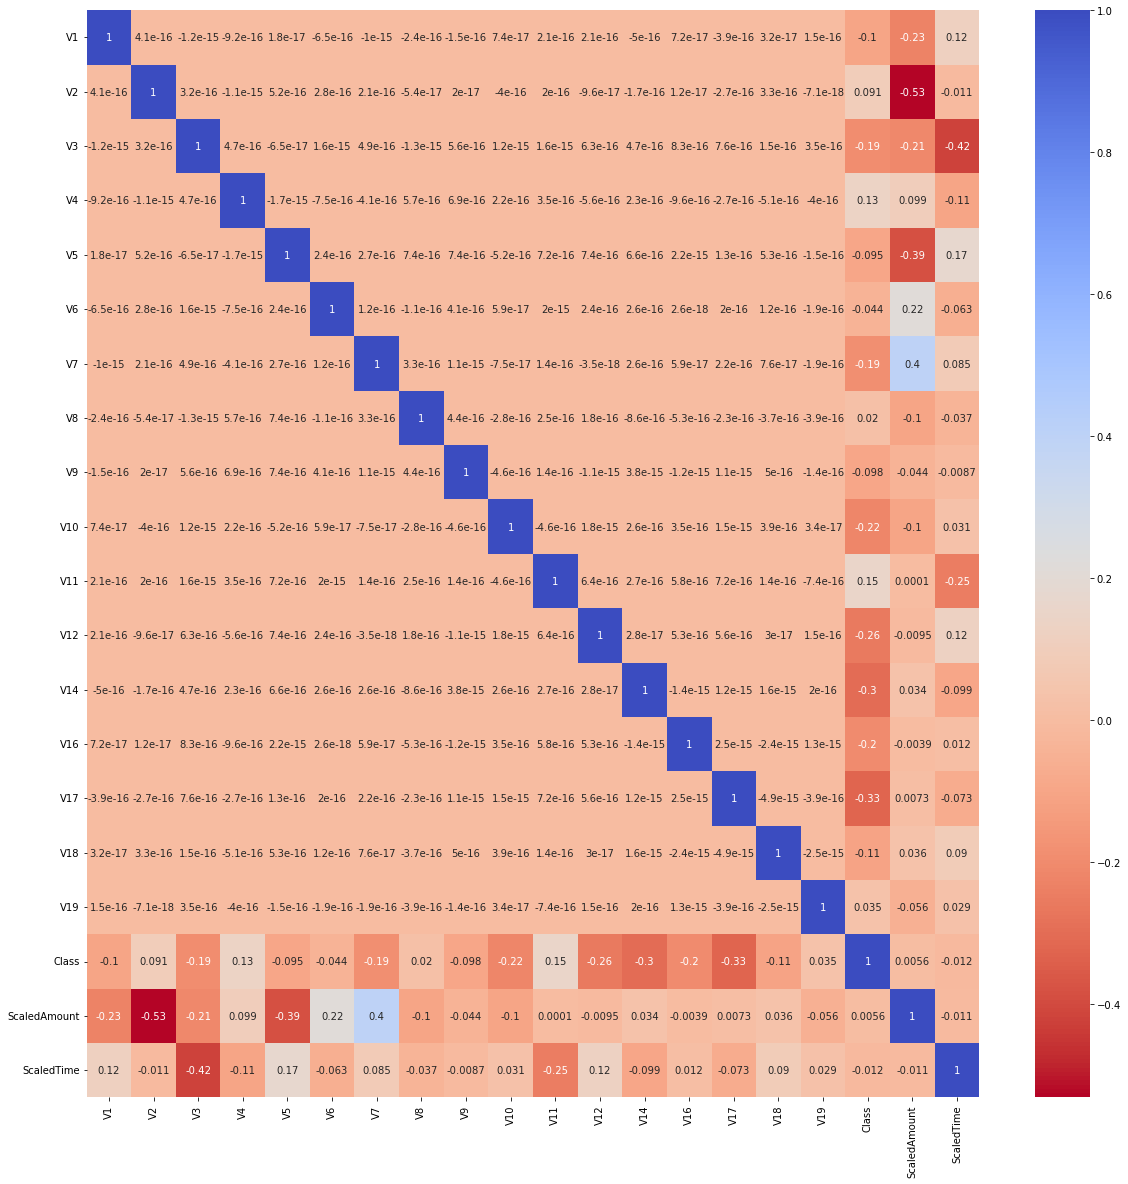

In [48]:
sns.heatmap(df.corr(),cmap="coolwarm_r",annot=True)

In [33]:
df.drop(["V22","V23","V24","V25","V26","V27","V28","V15","V13","V21","V20"],axis=1,inplace=True)

<AxesSubplot:>

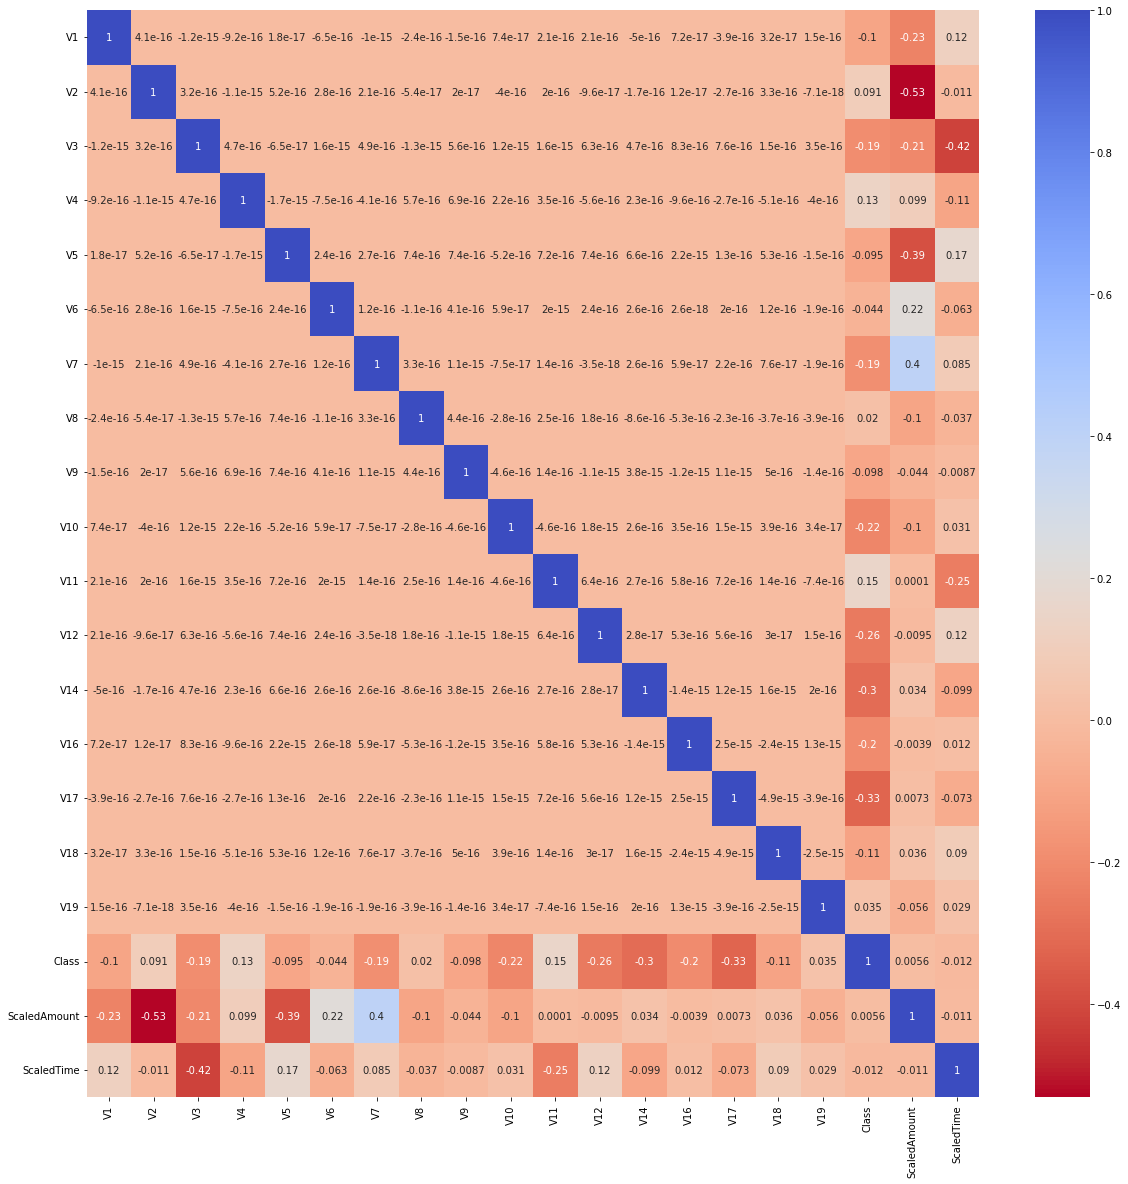

In [49]:
sns.heatmap(df.corr(),cmap ="coolwarm_r",annot=True)

In [39]:
time_series = df.groupby(["ScaledTime", "Class"]).size().unstack()
time_series

Class,0,1
ScaledTime,,
-0.994983,2.0,NaN
-0.994972,2.0,NaN
-0.994960,2.0,NaN
-0.994937,1.0,NaN
-0.994901,2.0,NaN
...,...,...
1.034939,1.0,NaN
1.034951,1.0,NaN
1.034963,1.0,NaN


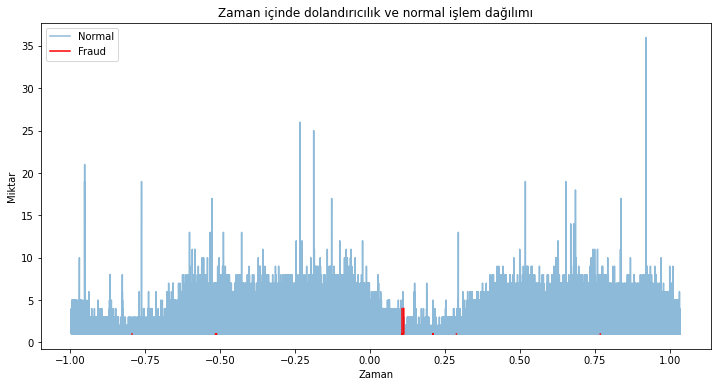

In [40]:
time_series = df.groupby(["ScaledTime", "Class"]).size().unstack()

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series[0], label="Normal",alpha=0.5)
plt.plot(time_series.index, time_series[1], label="Fraud",color = "red")
plt.xlabel("Zaman")
plt.ylabel("Miktar")
plt.title("Zaman içinde dolandırıcılık ve normal işlem dağılımı")
plt.legend()
plt.show()

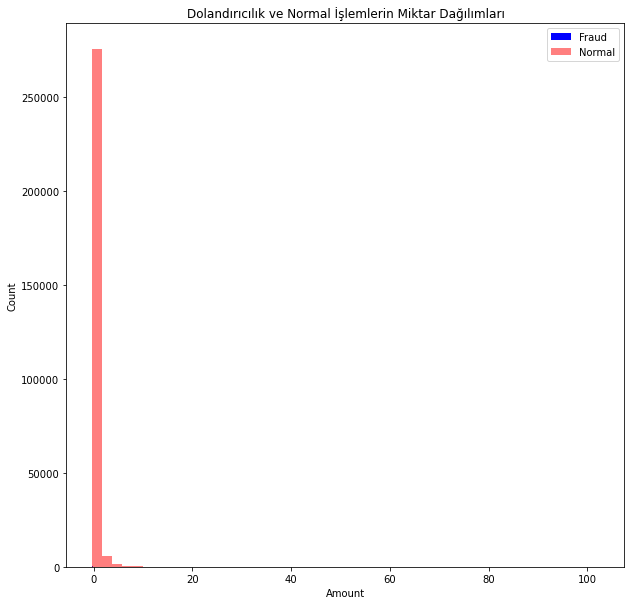

In [44]:
fraud_transactions = df[df["Class"] == 1]
normal_transactions = df[df["Class"] == 0]

plt.figure(figsize=(10, 10))
plt.hist(fraud_transactions["ScaledAmount"], bins=50, alpha=1, label="Fraud",color="blue")
plt.hist(normal_transactions["ScaledAmount"], bins=50, alpha=0.5, label="Normal",color = "red")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.title("Dolandırıcılık ve Normal İşlemlerin Miktar Dağılımları")
plt.legend()
plt.show()

## MODEL BELİRLEME

Bu veri setinde non fraud ve fraud 2 farklı sonuç olduğundan bir classification modeli kullanmanın daha uygun olduğunu düşündüm.
Lakin uygun parametrelere erişmem çok uzun zaman alıyor çalışmasına rağmen çok yüksek bir başarı puanı alıyorum.
Model overfitting oluyor.
Burada da aslında kullanmak istediğim modellerden birisini ve parametrelerini açıklayacağım

Bu veri setinde XGBoost (Extreme Gradient Boosting) modelini kullanacaktım . XGBoost kullanmanın avantaji Gradient Boosting algoritmasının optimize edilmiş yüksek performanslı hali olmasıdır. Daha az kaynak ile daha hızlı bir performans için karar ağacı tabanlı bir algoritma şeklinde
oluşturulmuştur.

#### Nasıl Çalışır ? 


Öncelikle bir tahmin yapılır bu tahmin doğru sonuca ulaşmak için ilk aşamadır bu varsayılan olarak 0.5 seçilir.
Yapılan bu tahminin ne kadar iyi olduğu modelin hatalı tahminleri ile incelenir.
Sonrasında bu bir ağaç yapısına aktarılır ve hatalar öğrenilerek doğru tahmine yaklaşılır
Her ağaç için bir benzerlik skoru hesaplanır bu da ne kadar iyi gruplandığını gösterir

Similarity Score = (Sum of Residuals,Squared)/Number of Residuals +λ
Lambdamız regülarizasyon parametremizdir

Buradan sonra hangi ağacın daha iyi olduğunu belirlemek için
Kazanç = Sol Benzerlik Skoru+ Sağ Benzerlik Skoru – Önceki Ağacın Benzerlik Skoru 
Kazanç hesaplanır

Ağaç belirlendikten sonra budama(prune) işlemi başlar ve gamma parametresi seçilir. Bu bir değerleme parametresidir
Gammayı arttırmak sadece değerli dalların kalmasına ve aşırı öğrenmenin önüne geçilmesine yol açar . 
- değer alması dalların budanacağı anlamına gelir

Lambda değeri de arttıkça kazanç skoru düşer böylelikle öğrenme zorlaşır fakat overfitting azalır


## Neden daha iyi performans gösterir ?

Regülarizasyon

Budama

Boş Değerler ile Çalışılabilesi

Sistem Optimizasyonu

Boş Değerlerle Çalışılabilmesi

parameters = {
        'n_estimators': [100, 500],
        
        'subsample': [0.8, 1.0], 
        
        'gamma' : [0,1,5],
        
        'max_depth': [3, 4, 5], 
        
        'learning_rate': [0.1, 0.3]}

### Kullanılan parametreler genel olarak böyledir modele göre değişiklik yapılabilir

Learning rate çok küçük olursa yavaş çalışır overfitting önüne geçilir çok yüksek olursa hızlı çalışır ama overfitting olur

n_estimators= Kullandığımız ağaç sayısını temsil eder. Büyük veri setlerinde 100 küçük-orta ölçekte veri setlerinde 1000 tercih edilebilir.

subsample =  Verisetindeki örneklerin(sample,observation) her bir karar ağacında hangi yüzde ile kullanılacağını tayin eder. Uygun bir yüzde verideki rastgeleliği(randomness) artırıp varyansı düşürmeye yardımcı olabilir.

max_depth =Her bir ağacın ulaşacağı maksimum derinliği ifade eder. Diğer bir deyişle her bir karar ağacında maksimum sayıda kullanılacak özellik diyebiliriz. Derinlik arttıkça model daha kompleksleşir ve eğer ki verinizde gürültü ya da outlier miktarı fazla ise derinliğin de fazla olması varyansın artmasına yani aşırı öğrenmeye sebep olur.

Her iterasyonda çıktısı olarak modelin öğrenim durumu, toplam süre ve kalan süre bilgisi gelmektedir. Bu çıktı çok iterasyonun olduğu durumda ekranda çok fazla alan kaplamakta ve buna değecek kadar bilgi vermemektedir. Verbose parametresi ile bu çıktıların sayısı azaltılabilmektedir ya da tamamen kaldırılabilir. Örneğin verbose=50 olan durumda, model her 50 iterasyon için 1 çıktı verecektir.

GridSearchCV ile çok katmanlı yapıya sokarak en uygun parametreler bulunabilir

### Örnek bir model oluşturma

In [ ]:
X = df.drop(["Class"],axis=1)
y = df["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)


parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3]}
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, parameters, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)
xgb_cv_model.best_params_

xgb = XGBClassifier(learning_rate = 0.1,
                    max_depth = 3,
                    gamma=1,
                    n_estimators = 100,
                    subsample = 0.6)

xgb_tuned =  xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)